## Jupyter Cell Magic

[youtube](https://www.youtube.com/watch?v=DMW11FGz5Kg)
[notebook](https://github.com/nicolaskruchten/pyconca/blob/master/jupyter_magic.ipynb)

## Time for some Magic!
<hr>
Lines and cells that start with % are not interpreted like normal Python code: they are magical. Let's try a simple one first which will show us what magic is available
% - Line magic
%% - Cell magic

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [2]:
%ls

01-widget-intro.html*   02-cell-magic.ipynb*         post-save-hook.py*
01-widget-intro.ipynb*  jupyter_notebook_config.py*
01-widget-intro.py*     pivottablejs.html*


In [3]:
%time print("do you have time")

do you have time
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 270 µs


In [4]:
%%timeit
x =0 
for i in range(10): x+=i

582 ns ± 9.46 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
%%bash
curl http://localhost:8888/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [6]:
# 3rd party magic
%load_ext sql

/opt/conda/lib/python3.6/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.6/site-packages/sql/magic.py:4: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils.traitlets import Bool, Int, Unicode


In [7]:
%sql sqlite://

'Connected: None@None'

In [8]:
%%sql

DROP TABLE IF EXISTS hockey;
CREATE TABLE hockey ("Team", "Stanley Cups Won", "Country");
INSERT INTO hockey VALUES ("Montreal Canadiens", 24, "Canada");
INSERT INTO hockey VALUES ("Detroit Red Wings", 11, "USA");
INSERT INTO hockey VALUES ("Boston Bruins", 6, "USA");
INSERT INTO hockey VALUES ("Chicago Blackhawks", 11, "USA");
INSERT INTO hockey VALUES ("Toronto Maple Leafs", 13, "Canada");

Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [9]:
%sql SELECT * FROM hockey ORDER BY "Stanley Cups Won" DESC LIMIT 3

Done.


Team,Stanley Cups Won,Country
Montreal Canadiens,24,Canada
Toronto Maple Leafs,13,Canada
Detroit Red Wings,11,USA


In [10]:
class Thing():
    def _repr_html_(self):
        return """<h3 style="color: blue; text-align: center;">Hi Senthil!, I am a blue thing</h3><br/>"""

thing = Thing()
thing

## Going visual with Matplotlib
The matplotlib cell magic lets us tell Jupyter we want to see charts inline with the notebook.

In [11]:
%matplotlib inline

Done.


([<matplotlib.patches.Wedge at 0x7f56f8a32da0>,
  <matplotlib.text.Text at 0x7f56f8a4e240>])

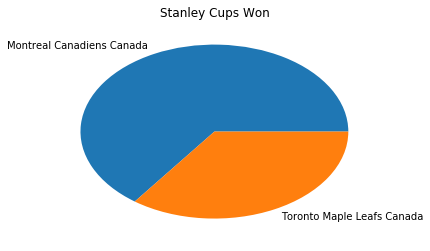

In [12]:
data = %sql SELECT * FROM hockey WHERE country='Canada' 

data.pie()

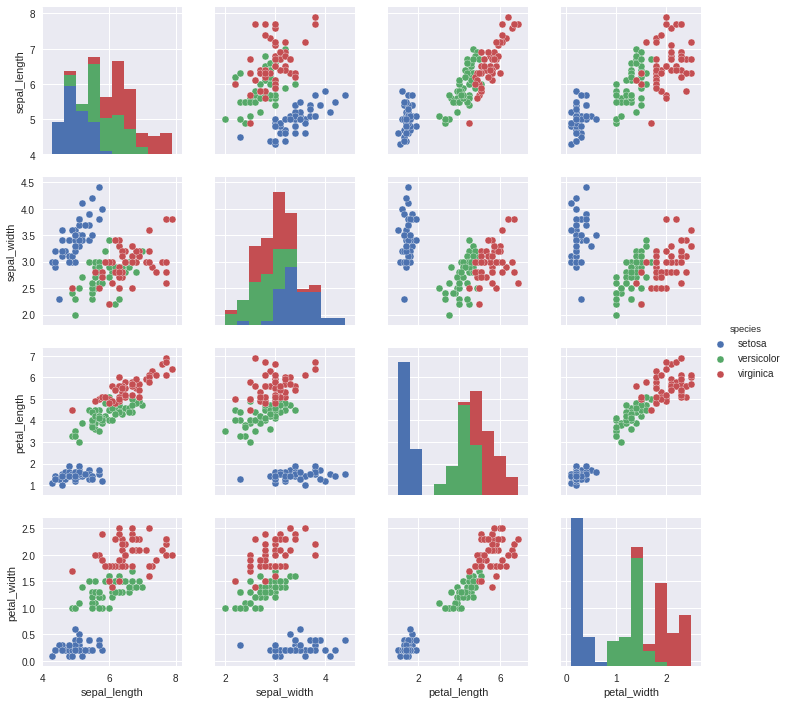

In [13]:
import seaborn as sns
sns.set()

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('../ml_datasets/mps.csv',encoding='latin-1')
df.head()

,Name,Party,Province,Age,Gender
0,"Liu, Laurin",NDP,Quebec,22.0,Female
1,"Mourani, Maria",Bloc Quebecois,Quebec,43.0,Female
2,"Sellah, Djaouida",NDP,Quebec,NaN,Female
3,"St-Denis, Lise",NDP,Quebec,72.0,Female
4,"Fry, Hedy",Liberal,British Columbia,71.0,Female


In [16]:
df.pivot_table(index="Party", columns="Province", aggfunc=len, values="Name")

Province,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,Territories
Party,,,,,,,,,,,
Bloc Quebecois,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
Conservative,27.0,21.0,11.0,8.0,1.0,4.0,73.0,1.0,5.0,13.0,2.0
Green,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liberal,NaN,2.0,1.0,1.0,4.0,4.0,11.0,3.0,7.0,1.0,NaN
NDP,1.0,12.0,2.0,1.0,2.0,3.0,22.0,NaN,59.0,NaN,1.0


In [17]:
from pivottablejs import pivot_ui
pivot_ui(df)

In [18]:

from ipywidgets import interact

@interact
def echo(input="Hello, world!", times=[1,5,1]):
    return (input+" ")*times

interactive(children=(Text(value='Hello, world!', description='input'), Dropdown(description='times', options=(1, 5, 1), value=1), Output()), _dom_classes=('widget-interact',))

In [19]:
import matplotlib.pyplot as plt

@interact
def polynomial(split=[0,10,20,100]):
    plt.pie([split/100.0, 1.0-split/100.0], labels=["Montreal Canadiens", "Toronto Maple Leafs"])
    plt.show()

interactive(children=(Dropdown(description='split', options=(0, 10, 20, 100), value=0), Output()), _dom_classes=('widget-interact',))